# Project 3: Web APIs & NLP Part 5 Models and Conclusion

Revathi Satkuna | DSIR1010 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# to make DataFrames easier to navigate through during cleaning/EDA
pd.set_option('display.max_columns',10000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

In [3]:
combo = pd.read_csv('data2/combo.csv')

In [4]:
# defining X and y and splitting into traintest sets
X = combo['stemmatized_lemmatized_tokenized_fulltext']
y = combo['subreddit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

## Baseline 

In [5]:
y.value_counts(normalize=True)

0    0.575033
1    0.424967
Name: subreddit, dtype: float64

Baseline value is 42.4% because there were much more posts in the creative subreddit in our dataframe. Predicting that every post will come from the creative writing subreddit would be accurate 42.4%.

## Evaluating Model

dslfkjadlsfjpepeeppe

##  Tfidf Vectorizer

In [6]:
# transforming X_train using TfidVectorizer
tvec = TfidfVectorizer(stop_words='english',ngram_range=(1,3), max_features= 14681 )
Z_train=tvec.fit_transform(X_train)
# 12642 is old max features

In [7]:
# looking at vocabulary
tvec.vocabulary_

{'process': 9324,
 'replac': 9802,
 'comput': 2207,
 'build': 1517,
 'upgrad': 13007,
 'new': 8125,
 'temp': 11819,
 'hire': 5595,
 'brought': 1484,
 'tech': 11750,
 'guy': 4998,
 'multipl': 7945,
 'depart': 2865,
 'oper': 8561,
 'good': 4634,
 'chanc': 1779,
 'actual': 261,
 'job': 6199,
 'alway': 432,
 'peopl': 8825,
 'thi': 11901,
 'citi': 1926,
 'caus': 1725,
 'tri': 12711,
 'flex': 4269,
 'lot': 7258,
 'real': 9578,
 'pain': 8679,
 'understand': 12919,
 'everyon': 3802,
 'want': 13883,
 'wa': 13313,
 'work': 14333,
 'im': 5823,
 'familiar': 4031,
 'softwar': 10901,
 'shit': 10609,
 'admin': 285,
 'box': 1403,
 'room': 10024,
 'make': 7393,
 'mistak': 7792,
 'appar': 684,
 'monitor': 7850,
 'tower': 12647,
 'power': 9188,
 'cord': 2377,
 'differ': 3077,
 'need': 8027,
 'store': 11349,
 'separ': 10473,
 'suppos': 11549,
 'filter': 4179,
 'giant': 4561,
 'look': 7158,
 'mark': 7543,
 'thank': 11866,
 'experienc': 3899,
 'point': 9106,
 'teach': 11732,
 'target': 11712,
 'employe': 36

In [8]:
# gets the feature names, commented out bc super long
# tvec.get_feature_names()

In [9]:
type(Z_train)

scipy.sparse.csr.csr_matrix

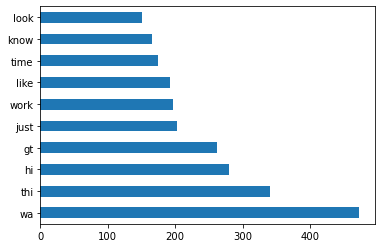

In [10]:
# Convert X_train into a DataFrame.
Z_train_df = pd.DataFrame(Z_train.toarray(), columns=tvec.get_feature_names())

# plot top occuring words
Z_train_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

### Logistic Regression Model Scoring

In [11]:
# instantiate and fit model
lr = LogisticRegression(solver = 'lbfgs', max_iter=5000)
lr.fit(Z_train_df, y_train)
# scoring train data model
lr.score(Z_train,y_train)

0.9943080754180007

In [12]:
cross_val_score(lr, Z_train_df, y_train, cv=5).mean()

0.9868373107870457

In [13]:
# transform test
Z_test=tvec.transform(X_test)

In [14]:
# creating Z_test DataFrame
Z_test_df = pd.DataFrame(Z_test.toarray(), columns=tvec.get_feature_names())


In [15]:
# scoring test data model
lr.score(Z_test,y_test)

0.9908713692946058

### Random Forest Classifier Model Scoring

In [16]:
# instantiate and fit model
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=None, 
                            max_features='log2', 
                            min_samples_split=50)
rf.fit(Z_train_df, y_train)
# scoring train model data
rf.score(Z_train, y_train)

0.9989327641408752

In [17]:
cross_val_score(rf,Z_train_df,y_train,cv=5).mean()

0.9856514930657369

In [18]:
rf.score(Z_test,y_test)

0.9869986168741356

### Logistic Regression Model Features Strength

In [19]:
Z_train_df.sum().sort_values(ascending=False).head(20)

wa        472.870665
thi       339.963547
hi        279.978048
gt        262.470357
just      202.529865
work      196.976697
like      192.663292
time      174.686860
know      165.552989
look      150.386364
want      146.752229
user      145.698723
don       140.631350
write     139.630146
day       139.227789
need      128.158764
feel      127.892802
love      127.022463
amp       124.363469
comput    122.206176
dtype: float64

In [20]:
Z_test_df.sum().sort_values(ascending=False).head(20)

wa       205.109820
thi      144.647927
hi       122.559307
gt       114.509535
just      89.778614
like      84.398255
work      82.801795
time      73.684790
know      73.429447
want      67.690871
look      64.384850
user      63.136178
love      62.226365
don       61.115540
write     60.002654
day       59.905134
feel      56.664539
need      55.479236
make      54.334998
tri       53.164820
dtype: float64

Looking at the strength of the features can help in predicting the subreddits.  Since we classified the creative writing subreddit posts as 0 and the tech support subreddit posts as 1, features with a negative correlation will correspond with the creative writing subreddit and features with a positive correlation will correspond with the tech support subreddit.

## Feature Plots

In [21]:
# getting the most positively correlated and negatively correlated features 
# which would correspond to the creative writing and tech support subreddits 
best_features = sorted(list(zip(lr.coef_[0], tvec.get_feature_names())))
best_features[:10] + best_features[-10:]

[(-4.413926884477267, 'write'),
 (-3.26363835682511, 'love'),
 (-3.0690186182181423, 'feel'),
 (-2.9350376077128746, 'life'),
 (-2.583191811387755, 'eye'),
 (-2.5418051581676284, 'creativ'),
 (-2.329417031880311, 'world'),
 (-2.1409958057949856, 'poem'),
 (-1.9699033917223847, 'writer'),
 (-1.8629999138012536, 'book'),
 (3.4757353112216314, 'laptop'),
 (3.5796495043889904, 'phone'),
 (3.657954863975696, 'email'),
 (3.672177168373572, 'support'),
 (3.7963536751817397, 'custom'),
 (4.200313115793163, 'tech'),
 (5.356575822026303, 'user'),
 (5.395534255117865, 'work'),
 (5.56144263199051, 'comput'),
 (5.686537668678329, 'gt')]

In [22]:
# making feature list for creative writing and converting to dataframe
creative_features = []
for a,b in best_features[:20]:
    features = {}
    features['feature'] = b
    features['corr_coef_'] = a
    creative_features.append(features)
creative_df = pd.DataFrame(creative_features)
creative_df.head(20)
    

,feature,corr_coef_
0,write,-4.413927
1,love,-3.263638
2,feel,-3.069019
3,life,-2.935038
4,eye,-2.583192
5,creativ,-2.541805
6,world,-2.329417
7,poem,-2.140996
8,writer,-1.969903
9,book,-1.863000


In [23]:
# making feature list for tech support 
tech_features = []
for a,b in best_features[:-21:-1]:
    features = {}
    features['feature'] = b
    features['corr_coef_'] = a
    tech_features.append(features)
tech_df = pd.DataFrame(tech_features)
tech_df.head(20)

,feature,corr_coef_
0,gt,5.686538
1,comput,5.561443
2,work,5.395534
3,user,5.356576
4,tech,4.200313
5,custom,3.796354
6,support,3.672177
7,email,3.657955
8,phone,3.579650
9,laptop,3.475735


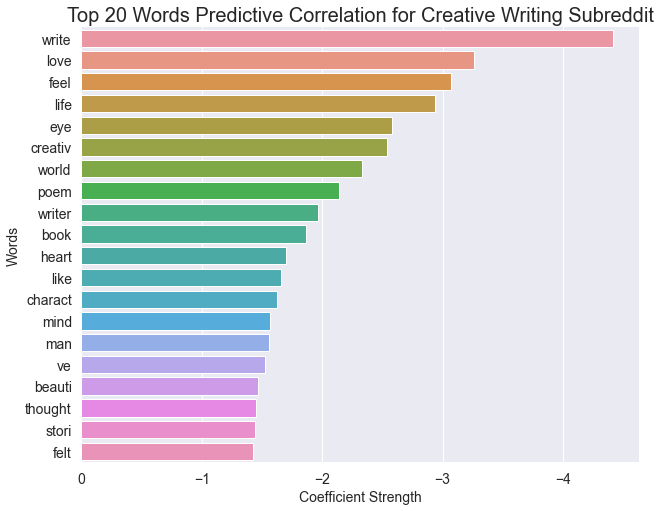

In [44]:
# plotting features with strongest correlations for creative writing subreddit
plt.figure(figsize=(10,8))
sns.barplot(data=creative_df, x='corr_coef_', y='feature').invert_xaxis()
plt.xlabel('Coefficient Strength', size=14)
plt.ylabel('Words', size=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('Top 20 Words Predictive Correlation for Creative Writing Subreddit', size=20)
sns.despine(left=True, bottom=True)
plt.savefig('20wordscreativewriting');

n: The above image represents the words in the Creative Writing subreddit with the highest negative coefficients.

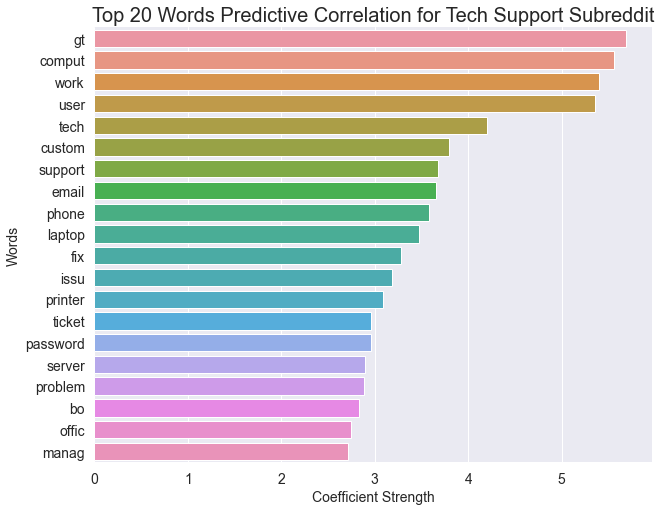

In [43]:
# plotting features with strongest correlations for creative writing subreddit
plt.figure(figsize=(10,8))
sns.barplot(data=tech_df, x='corr_coef_', y='feature')
plt.xlabel('Coefficient Strength', size=14)
plt.ylabel('Words', size=14)
plt.yticks(size=14)
plt.xticks(size=14)
plt.title('Top 20 Words Predictive Correlation for Tech Support Subreddit', size=20)
sns.despine(left=True, bottom=True);
plt.savefig('20wordstechsupport')

n: The above image represents the words in the Tech Support subreddit with the highest positive coefficients.

In [26]:
prob= lr.predict_proba(Z_test)[:,0]

In [27]:
prob[:10]

array([0.87963231, 0.99461967, 0.01764154, 0.99233143, 0.09367417,
       0.76428238, 0.92119506, 0.03920905, 0.90855767, 0.92395499])

In [28]:
pred = lr.predict(Z_test)
pred[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [29]:
cm=confusion_matrix(y_test,pred)

In [30]:
# creating a confusion matrix to determine other metrics
df_cm=pd.DataFrame(cm,columns=['Predicted Creative Writing', 'Predicted Tech Support'], index = ['Actual Creative Writing','Actual Tech Support'])
df_cm

,Predicted Creative Writing,Predicted Tech Support
Actual Creative Writing,2101,6
Actual Tech Support,27,1481


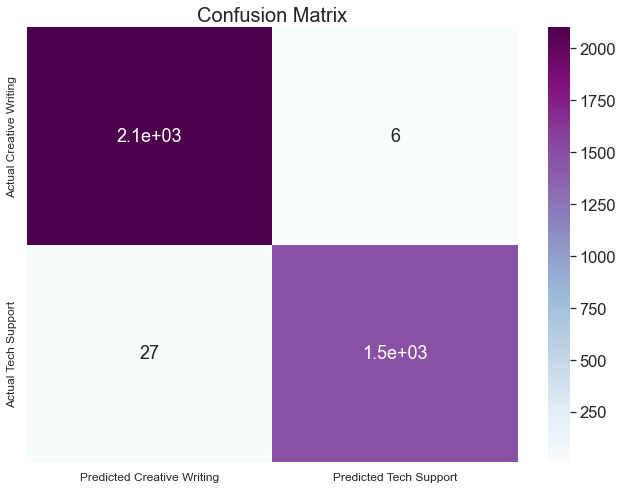

In [42]:
plt.figure(figsize=(11,8))
sns.heatmap(df_cm, annot=True, cmap='BuPu')
sns.set(font_scale=2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Confusion Matrix', size=20);
plt.savefig('confusion_matrix')

n: The above image represents the confusion matrix of the predictions of y_test set describing the ratio of true negatives, false positives, false negatives and true positives. 

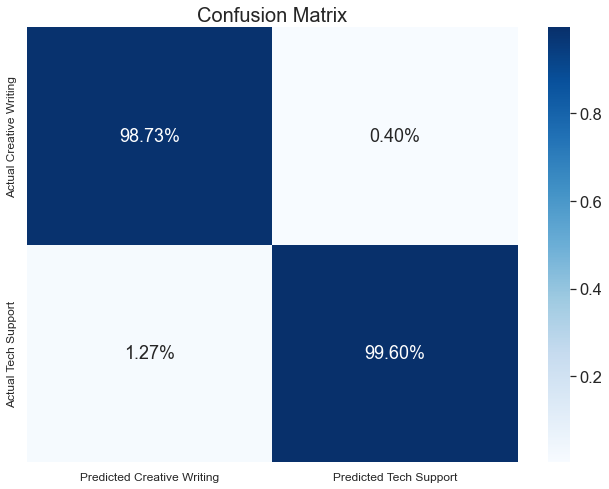

In [41]:
plt.figure(figsize=(11,8))
sns.heatmap(df_cm/np.sum(df_cm), annot=True, 
            fmt='.2%', cmap='Blues')
sns.set(font_scale=1.5)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Confusion Matrix', size=20);
plt.savefig('confusion_matrix_percents')

n: The above image represents the confusion matrix of the predictions of y_test set describing the ratio of true negatives, false positives, false negatives and true positives, in percents. 

In [33]:
# raveling confusion matrix to get values for tn,fp,fn,tp to calculate sensitivity and other metrics
tn,fp,fn,tp=confusion_matrix(y_test,pred).ravel()

In [34]:
# classification report
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99      2107\n           1       1.00      0.98      0.99      1508\n\n    accuracy                           0.99      3615\n   macro avg       0.99      0.99      0.99      3615\nweighted avg       0.99      0.99      0.99      3615\n'

In [35]:
# accuracy
(tp+tn)/(tp+tn+fp+fn)

0.9908713692946058

In [36]:
# sensitivity
tp/(tp+fp)

0.995965030262273

In [37]:
# misclassification rate
(fp+fn)/(fp+fn+tp+tn)

0.009128630705394191

In [38]:
# specificity
tn/(tn+fn)

0.987312030075188

In [39]:
# precision
tp/(tp+fn)

0.9820954907161804

In [40]:
# baseline accuracy
y_test.value_counts(normalize=True)[1]

0.41715076071922547

## Executive Summary

This project focuses on three major concepts we learned in class: data wrangling/gathering/acquisition, natural language processing, and classification modeling. We first used Pushshift's API to collect posts from the r/creativewriting and the r/talesfromtechsupport subreddits. We then clean the data and then perform a binary classification by using Natural Language Processing to train a classifier on which subreddit a given post came from. We clean the data by selecting relevant features from the raw data and removing null values and creating new relevant columns via column transformations. Our most relevant columns were the 'selftext' and the 'title' columns, and we combined those to create a 'fulltext' column. We also assigned a binary value 0 or 1 to the creative writing subreddit posts and the tech support subreddit post in a new column called 'subreddit' so that we can use for Classification modeling later. To prepare our cleaned data for Natural Language Processing, we first used a tokenizer on the fulltext column and then lemmatized and stemmatized it to better prepare it for NLP. We then wanted to perform either a CountVectorizer or a TfidfVectorizer to see which one had a better score, we then compare the best scores between a Pipeline with a TfidfVectorizer running into a Multinomial Naive Bayes and then s setting up a BayesSearchCV and then CountVectorizer running into a Multinomial Naive Bayes and then setting up a BayesSearchCV.  TfidfVectorizer had a higher best score, so we used its best parameters it gave for max_features.  We would use the 'stemmatized_lemmatized_tokenized_fulltext' column as our feature and the 'subreddit' column as our target.  We then created and compared two models, a Random Forest Classifier and a Logistic Regression Classifier. From there, we compared the baseline score to the accuracy scores of the models, the higher the accuracy score the more successful you have trained your computer to predict whether a phrase corresponds to the Creative Writing and Technical Support subreddits. Since our Logistic Regression model had the highest score, we used it for our models.  We  visualized the models by displaying the top positive and negative correlations of the features, corresponding to the Technical Support and Creative Writing subreddits, respectively. We also plotted the confusion matrix and its metrics to show how effective our model is at predicting whether a set of words will belong into either subreddit.


## Conclusion

For calculating for whether the text post will be predicted to come from the creative writing subreddit or the tech support subreddit, if you predict that all the posts came from the creative writing subreddit, you would be correct about 58.2 % of the time.  This is because we had more posts from the creative writing subreddit.  For the tech support subreddit, if you predicted that all the posts came from it, you would be right about 41.7% of the time. Since the true positive of this classification matrix would correspond to the tech support reddit, the baseline accuracy would be 41.7%

Our Logistic Regression model had an accuracy of 99.4% for the training data and  99.1% for the testing data, and our Random Forest Classifier had an accuracy of 99.8% for our training data and 98.6% for our testing data.  Since our testing data scored higher in our Logistic Regression model, we went forward to do our analysis on the Logistic Regression model. 

After analyzing the confusion matrix generated with the Logistic Regression model, the accuracy was 99.1%.  The sensitivity was 99.6%.  The misclassification rate was 0.9%.  The specificity is 98.7%. The precision is 98.2%.



## Recommendation

Seeing the results of this model, I am confident that it can be used to classify whether or not a text came from the r/creativewriting and r/talesfromtechsupport.  The class that requested help in this matter will be delighted.  Using this sort of modeling can help us develop any sort of classification model, and mayhaps models more relevant to stakeholders in businesses where money and power are involved. (Assuming there is enough data to work off of!) Since we are just working with college students, the goal is to further their education, but given the goal of financial profit, like in the stock market, you can apply it to a variety of more potentially fruitful circumstances.